# Base Computation for Neural Networks

Dataset: Fashion MNIST, images of clothes, shoes etc.

Train an Artificial Neural Network to classify these images

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test)= fashion_mnist.load_data()

X_train, X_test = X_train/255. , X_test/255.

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

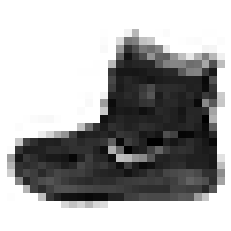

Ankle boot


In [4]:
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()
print(class_names[y_train[0]])

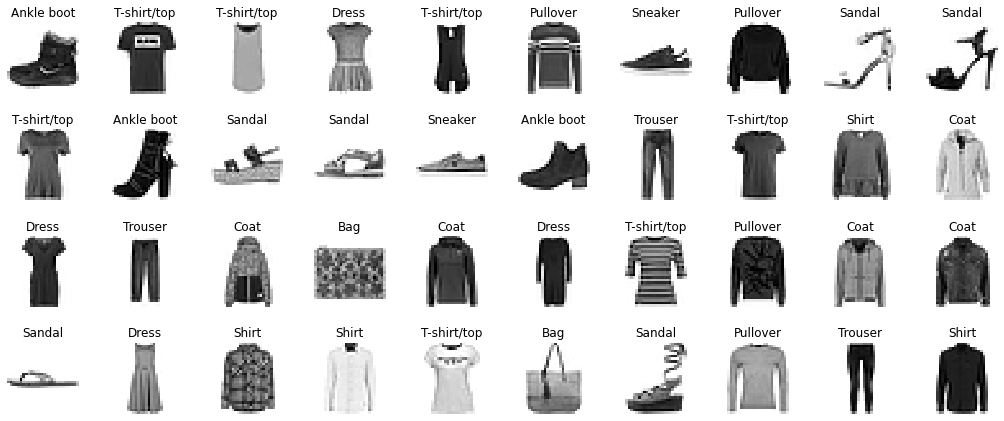

In [5]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.8, n_rows * 1.8))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [6]:
def build_model(activation,kernel_initializer):
    model = keras.models.Sequential()
    model.add(Flatten(input_shape=[28,28]))
    model.add(Dense(300,activation=activation,kernel_initializer=kernel_initializer))
    model.add(Dense(300,activation=activation,kernel_initializer=kernel_initializer))
    model.add(Dense(300,activation=activation,kernel_initializer=kernel_initializer))
    model.add(Dense(10,activation='softmax',kernel_initializer=kernel_initializer))
    return model

In [7]:
kernel_initializer = 'he_normal'
activation = 'relu'

In [8]:
model = build_model(activation, kernel_initializer)
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',
              metrics =['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
Total params: 419,110
Trainable params: 419,110
Non-trainable params: 0
_________________________________________________________________


# Training the Neural Network

We now train the model using $\mathtt{model.fit}$. Note the argument _validation_split_ passed to this function. 

Neural networks are typically trained while comparing with the validation data at each epoch. This gives us a monitor of possible overfitting even while the network is training.

We can also use this monitor as a means to control overfitting, see _early stopping_

In [9]:
epochs = 50
batch_size = 32

history = model.fit(X_train,y_train,validation_split=0.1,
                    epochs=epochs,batch_size = batch_size)

Epoch 1/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.6458 - accuracy: 0.7808 - val_loss: 0.5525 - val_accuracy: 0.7950
Epoch 2/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4506 - accuracy: 0.8412 - val_loss: 0.4067 - val_accuracy: 0.8552
Epoch 3/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4050 - accuracy: 0.8571 - val_loss: 0.4333 - val_accuracy: 0.8405
Epoch 4/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3768 - accuracy: 0.8657 - val_loss: 0.4165 - val_accuracy: 0.8528
Epoch 5/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3557 - accuracy: 0.8722 - val_loss: 0.3791 - val_accuracy: 0.8660
Epoch 6/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3387 - accuracy: 0.8787 - val_loss: 0.3703 - val_accuracy: 0.8627
Epoch 7/50
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3257 - accuracy: 0.8827 - val_loss: 0.3353 - val_accuracy:

# Results

We reached a training loss of about 0.1 and validation loss of 0.3. This appears to be a sign of overfitting. Indeed the model reaches an accuracy of 0.96 on the train data while the accuracy on the validation data is significantly less, only 0.89.

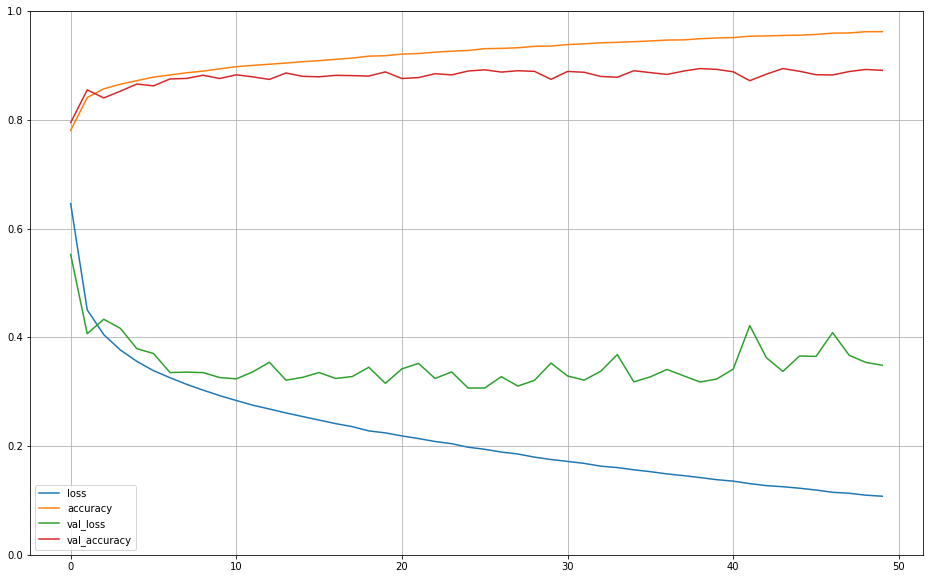

In [10]:
pd.DataFrame(history.history).plot(figsize=(16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Evaluating the model

The validation data above was supposed to be a placeholder for actual unseen data. We estimate that the model should reach a loss of 0.34 and an accuracy of 0.89 on unseen data.

We can check this by evaluating the model on test data. The actual numbers are not too far off from our expectations. The loss is 0.37 and the accuracy is 0.88

In [13]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8867
Test loss: 0.37476983666419983
Test accuracy: 0.8866999745368958


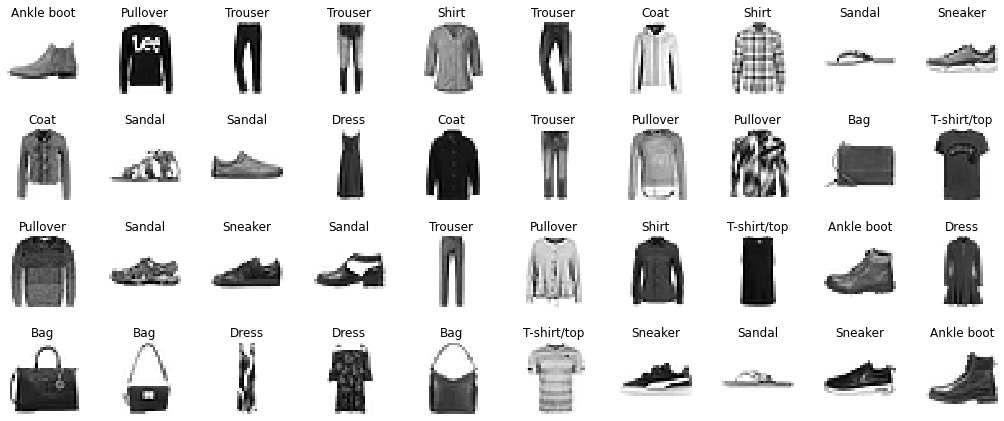

In [19]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.8, n_rows * 1.8))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Plot Misclassifications

In [22]:
misclassified=np.where(y_pred!=y_test)[0]
X_misclassified = X_test[misclassified]
y_misclassified = y_pred[misclassified]

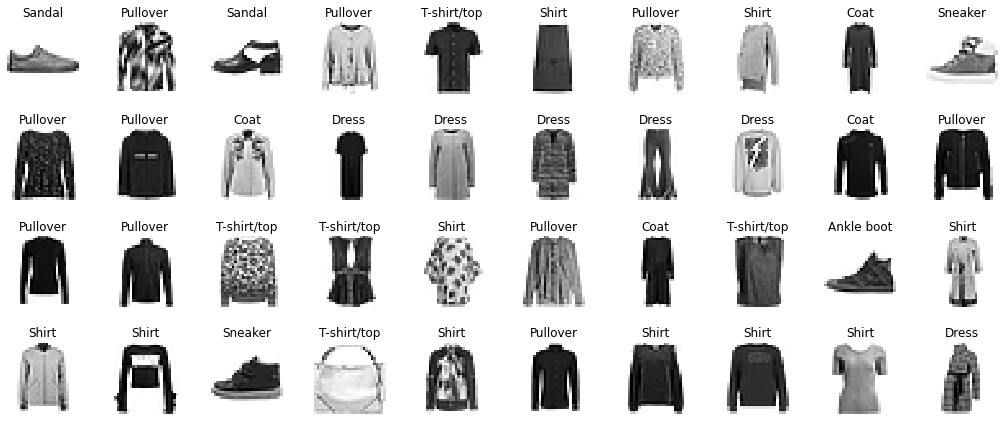

In [23]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.8, n_rows * 1.8))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_misclassified[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_misclassified[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## The confusion matrix

In [27]:
print(confusion_matrix(y_test,y_pred))

[[882   1  10   9   3   2  87   0   6   0]
 [  8 969   0  14   3   1   5   0   0   0]
 [ 30   0 833  11  81   2  42   0   1   0]
 [ 62   5  12 850  35   2  28   0   5   1]
 [  4   1 103  19 829   1  40   1   2   0]
 [  0   0   0   1   0 966   0  19   3  11]
 [150   1  97  15  69   0 662   0   6   0]
 [  0   0   0   0   0  26   0 942   1  31]
 [ 17   0   2   1   2   4   3   4 967   0]
 [  1   0   0   0   0   9   0  23   0 967]]
